# Stable Diffusion XL with Neuronx: Text to image

`🤗 Optimum` extends `🤗 Diffusers` to support inference on the second generation of Neuron devices(powering Trainium and Inferentia 2). It aims at inheriting the ease of Diffusers on Neuron.

To get started, make sure you have [configured your inf2 / trn1 instance](https://huggingface.co/docs/optimum-neuron/installation), and installed optimum:

In [2]:
%mkdir sdxl

In [43]:
%rm -rf sdxl

In [44]:
%ls

stable-diffusion-txt2img.ipynb*  stable-diffusion-xl-txt2img.ipynb*


In [5]:
!sudo apt-get install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  python3-wheel
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 8 not upgraded.
Need to get 3316 kB of archives.
After this operation, 11.1 MB of additional disk space will be used.
Get:1 http://us-east-1.ec2.archive.ubuntu.com/ubuntu focal/universe amd64 git-lfs amd64 2.9.2-1 [3316 kB]
Fetched 3316 kB in 0s (30.4 MB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 151938 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.9.2-1_amd64.deb ...
Unpacking git-lfs (2.9.2-1) ...
Setting up git-lfs (2.9.2-1) ...
Processing triggers for man-db (2.9.1-1) ...


In [45]:
!git lfs clone https://huggingface.co/GiantAnalytics/sdxl_fine_tuned_model_aditya_2

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'sdxl_fine_tuned_model_aditya_2'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 71 (delta 18), reused 0 (delta 0), pack-reused 3 (from 1)
Unpacking objects: 100% (71/71), 625.98 KiB | 5.40 MiB/s, done.


In [1]:
%pwd

'/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion'

In [13]:
%ls

config.json
diffusion_pytorch_model-00001-of-00002.safetensors
diffusion_pytorch_model-00002-of-00002.safetensors
diffusion_pytorch_model.bin
diffusion_pytorch_model.safetensors.index.json


In [5]:
%cd unet/

/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet


In [50]:
%cd huggingface-neuron-notebooks/stable-diffusion

/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion


In [8]:
!pip install transformers 

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [11]:
import json
from diffusers import UNet2DConditionModel

# Load the config file
config_file_path = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/config.json"
with open(config_file_path, 'r') as f:
    config = json.load(f)

# Initialize the UNet model with the loaded config
unet_model = UNet2DConditionModel(**config)

In [12]:
import safetensors.torch
import torch

# Paths to the safetensors files
safetensor_file_1 = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00001-of-00002.safetensors"
safetensor_file_2 = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00002-of-00002.safetensors"

# Load both parts of the state dictionary
state_dict_part1 = safetensors.torch.load_file(safetensor_file_1, device="cpu")
state_dict_part2 = safetensors.torch.load_file(safetensor_file_2, device="cpu")

# Merge the state dictionaries
state_dict = {**state_dict_part1, **state_dict_part2}

# Load the state dictionary into the UNet model
unet_model.load_state_dict(state_dict)

# Save the model weights as a .bin file
torch.save(unet_model.state_dict(), "diffusion_pytorch_model.bin")

In [51]:
import torch
from safetensors.torch import load_file as load_safetensors
safetensors_path = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00001-of-00002.safetensors"
bin_path = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00001-of-00002.bin"
# Load the safetensors model
model_weights = load_safetensors(safetensors_path)
# Save it as .bin
torch.save(model_weights, bin_path)

In [54]:
import torch
from safetensors.torch import load_file as load_safetensors
safetensors_path = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00002-of-00002.safetensors"
bin_path = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00002-of-00002.bin"
# Load the safetensors model
model_weights = load_safetensors(safetensors_path)
# Save it as .bin
torch.save(model_weights, bin_path)

In [55]:
%ls -lh "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00001-of-00002.bin"

-rw-rw-r-- 1 ubuntu ubuntu 9.4G Aug 31 11:22 /home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00001-of-00002.bin


In [57]:
!mv /home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model-00002-of-00002.bin /home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2/unet/diffusion_pytorch_model.bin

In [1]:
!pip install "optimum[neuronx, diffusers]" matplotlib

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install --upgrade-strategy eager optimum[neuronx]

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Compilation

To deploy SDXL models, we will also start by compiling the models. We support the export of following components in the pipeline to boost the speed:

* Text encoder
* Second text encoder
* U-Net (a three times larger UNet than the one in Stable Diffusion pipeline)
* VAE encoder
* VAE decoder

You can either compile and export a Stable Diffusion Checkpoint via CLI or `NeuronStableDiffusionXLPipeline` class. 
In this tutorial, we will export [`stabilityai/stable-diffusion-xl-base-1.0`](https://huggingface.co/stabilityai/stable-diffusion-xl-base-1.0) with the API.

In [14]:
from optimum.neuron import NeuronStableDiffusionXLPipeline

model_id = "/home/ubuntu/huggingface-neuron-notebooks/stable-diffusion/sdxl_fine_tuned_model_aditya_2"
num_image_per_prompt = 1
input_shapes = {"batch_size": 1, "height": 1024, "width": 1024, "num_image_per_prompt": num_image_per_prompt}
compiler_args = {"auto_cast": "matmul", "auto_cast_type": "bf16", "inline_weights_to_neff": False}

In [15]:
# num_image_per_prompt = 1
# input_shapes = {"batch_size": 1, "height": 1024, "width": 1024, "num_image_per_prompt": num_image_per_prompt}
# compiler_args = {
#     "auto_cast": "matmul", 
#     "auto_cast_type": "bf16", 
#     "inline_weights_to_neff": False,
#     "low_cpu_mem_usage": False,  # Adding the recommended argument
#     "device_map": None  # Adding the recommended argument
# }

# # Compile and save
stable_diffusion_xl = NeuronStableDiffusionXLPipeline.from_pretrained(
    model_id, export=True, device_ids=[0, 1], **compiler_args, **input_shapes
)

save_directory = "sd_neuron_xl/"
stable_diffusion_xl.save_pretrained(save_directory)

Keyword arguments {'subfolder': '', 'use_auth_token': None, 'trust_remote_code': False} are not expected by StableDiffusionXLImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'shift_factor': None, 'use_post_quant_conv': True, 'use_quant_conv': True} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
/opt/aws_neuron_venv_pytorch/lib/python3.8/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Applying optimized attention score computation for sdxl.


2024-08-31 12:07:53.000946:  4062  INFO ||NEURON_CACHE||: Compile cache path: /var/tmp/neuron-compile-cache


neuronxcc-2.14.227.0+2d4f85be/MODULE_c4ffbe4114374aea74e1 not found in aws-neuron/optimum-neuron-cache: 404 Client Error. (Request ID: Root=1-66d3079a-2bc0c6db2c58d869326bc774;122efc86-9d1d-42f7-804b-c9b9b0845b31)

Entry Not Found for url: https://huggingface.co/api/models/aws-neuron/optimum-neuron-cache/tree/main/neuronxcc-2.14.227.0%2B2d4f85be%2FMODULE_c4ffbe4114374aea74e1?recursive=True&expand=False.
neuronxcc-2.14.227.0+2d4f85be/MODULE_c4ffbe4114374aea74e1 does not exist on "main" 
The model will be recompiled.
Keyword arguments {'subfolder': '', 'use_auth_token': None, 'trust_remote_code': False} are not expected by StableDiffusionXLImg2ImgPipeline and will be ignored.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

The config attributes {'shift_factor': None, 'use_post_quant_conv': True, 'use_quant_conv': True} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.
Applying optimized attention score computation for sdxl.
***** Compiling text_encoder *****
Using Neuron: --auto-cast matmul
Using Neuron: --auto-cast-type bf16


...
Compiler status PASS


[Compilation Time] 74.19 seconds.
***** Compiling text_encoder_2 *****
Using Neuron: --auto-cast matmul
Using Neuron: --auto-cast-type bf16


....
Compiler status PASS


[Compilation Time] 80.93 seconds.
***** Compiling unet *****
The compilation of SDXL's unet with the weights/neff separation is broken since the Neuron sdk 2.18 release. `inline_weights_to_neff` will be set to True and the caching will be disabled. If you still want to separate the neff and weights, please downgrade your Neuron setup to the 2.17.1 release.
Using Neuron: --auto-cast matmul
Using Neuron: --auto-cast-type bf16


.................................................................
Compiler status PASS


[Compilation Time] 1333.1 seconds.
***** Compiling vae_encoder *****
Using Neuron: --auto-cast matmul
Using Neuron: --auto-cast-type bf16


................
Compiler status PASS


[Compilation Time] 313.48 seconds.
***** Compiling vae_decoder *****
Using Neuron: --auto-cast matmul
Using Neuron: --auto-cast-type bf16


....................................
Compiler status PASS


[Compilation Time] 705.43 seconds.
[Total compilation Time] 2507.13 seconds.


2024-08-31 12:49:47.000049:  4062  INFO ||NEURON_CACHE||: Compile cache path: /var/tmp/neuron-compile-cache
2024-08-31 12:49:47.000062:  4062  INFO ||NEURON_CACHE||: Compile cache path: /var/tmp/neuron-compile-cache


Model cached in: /var/tmp/neuron-compile-cache/neuronxcc-2.14.227.0+2d4f85be/MODULE_470a48354c332024e23a.
Loading only U-Net into both Neuron Cores...
Saving the ('text_encoder', 'text_encoder_2', 'unet', 'vae_encoder', 'vae_decoder')...


In [17]:
from huggingface_hub import notebook_login
notebook_login()

In [18]:
# Push and share your model to the HuggingFace hub
repository_id = "GiantAnalytics/sdxl_fine_tuned_model_aditya_3"  # Replace with your repo id, eg. "Jingya/stable-diffusion-xl-base-1.0-neuronx".
stable_diffusion_xl.push_to_hub(save_directory, repository_id=repository_id, use_auth_token=True)

model.neuron:   0%|          | 0.00/497M [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/2.80G [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/630M [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/4.17G [00:00<?, ?B/s]

model.neuron:   0%|          | 0.00/329M [00:00<?, ?B/s]

Feel free to use the following command as well for compiling and exporting the model:

```bash
optimum-cli export neuron --model stabilityai/stable-diffusion-xl-base-1.0 \
  --task stable-diffusion-xl \
  --batch_size 1 \
  --height 1024 `# height in pixels of generated image, eg. 768, 1024` \
  --width 1024 `# width in pixels of generated image, eg. 768, 1024` \
  --num_images_per_prompt 1 `# number of images to generate per prompt, defaults to 1` \
  --auto_cast matmul `# cast only matrix multiplication operations` \
  --auto_cast_type bf16 `# cast operations from FP32 to BF16` \
  sd_neuron_xl/
```

We Recommend `inf2.8xlarge` or larger for compilation. You will also be able to compile the models with a CPU-only instance *(needs ~92GB memory)* using the CLI with `--disable-validation`, which disables the validation of inference on neuron devices.

In the following section, we will run the pre-compiled model on Neuron devices, to reduce expenses, you can run inference with `inf2.xlarge` instance.

## Text-to-image Inference

If you have pre-compiled Stable Diffusion XL models, you can load them directly to skip the compilation: 

In [3]:
from optimum.neuron import NeuronStableDiffusionXLPipeline
stable_diffusion_xl = NeuronStableDiffusionXLPipeline.from_pretrained("GiantAnalytics/sdxl_fine_tuned_model_aditya_3")  # Pass a local path or your repo id on the HuggingFace hub.

/opt/aws_neuron_venv_pytorch/lib/python3.8/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

Loading only U-Net into both Neuron Cores...


In [4]:
from diffusers import DPMSolverMultistepScheduler
stable_diffusion_xl.scheduler = DPMSolverMultistepScheduler.from_config(stable_diffusion_xl.scheduler.config)

In [5]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import time
import copy
import numpy as np 

Token indices sequence length is longer than the specified maximum sequence length for this model (78 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tranquility']
Token indices sequence length is longer than the specified maximum sequence length for this model (78 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['tranquility']


  0%|          | 0/50 [00:00<?, ?it/s]

[Inference Time] 20.99 seconds.


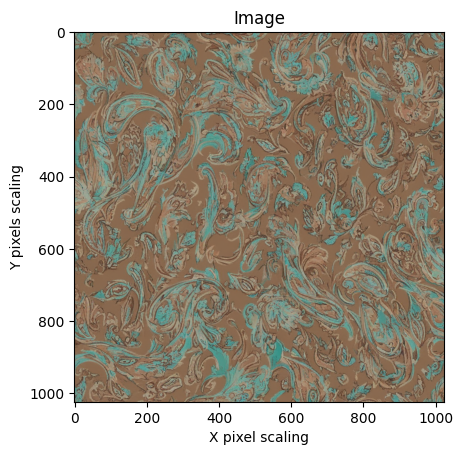

  0%|          | 0/50 [00:00<?, ?it/s]

[Inference Time] 20.13 seconds.


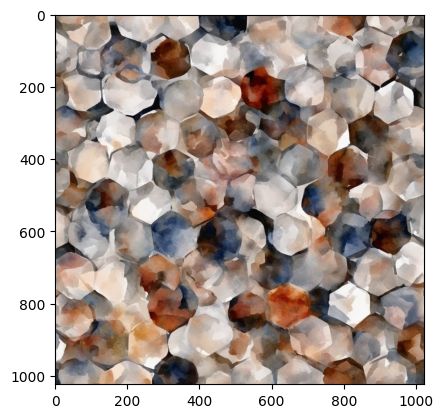

  0%|          | 0/50 [00:00<?, ?it/s]

[Inference Time] 20.16 seconds.


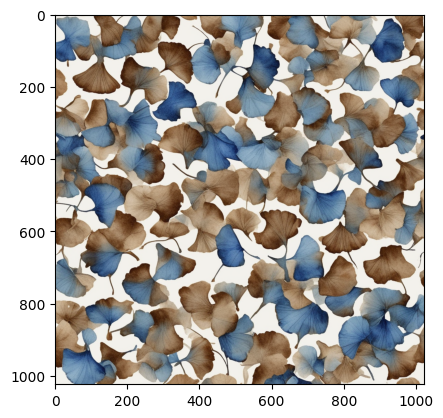

  0%|          | 0/50 [00:00<?, ?it/s]

[Inference Time] 20.18 seconds.


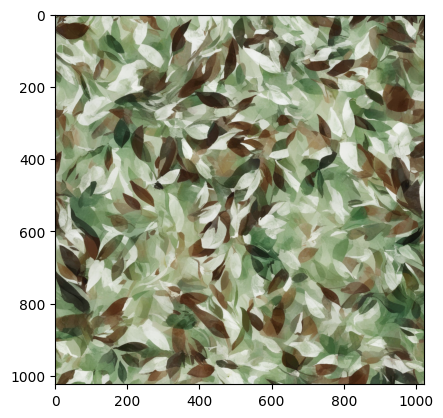

In [6]:
# Run pipeline
prompt = [
    "A seamless paisley image, paisley-based pattern featuring muted shades of brown, teal, olive, and pink. The pattern has a vintage, bohemian feel and would be perfect for a variety of applications, such as wallpaper, fabric, or home decor. The organic, flowing shapes of the paisleys are complemented by the soft, muted colors, creating a sense of calm and tranquility",
    "This seamless pattern features overlapping hexagons in a watercolor style. The hexagons are arranged in a random order, creating a sense of movement and energy. The pattern has a modern, abstract style ",
    "Generate a minimal design with watercolor painting of ginkgo leaves in various shades of blue and brown, with a few white highlights. The leaves are arranged in a repeating pattern on a white background.",
    "Generate a floral image with seamless pattern features a painterly, organic design of overlapping, stylized leaves in various shades of green and brown. The leaves have a hand-drawn, textured appearance and are arranged in a random, scattered manner, creating a sense of movement and energy."
]


plt.title("Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")

total_time = 0
for x in prompt:
    start_time = time.time()
    image = stable_diffusion_xl(x).images[0]
    inf_time = time.time() - start_time
    print(f"[Inference Time] {np.round(inf_time, 2)} seconds.")
    image.save("image.png")
    image = mpimg.imread("image.png")
    #clear_output(wait=True)
    plt.imshow(image)
    plt.show()